<a href="https://colab.research.google.com/github/saraid20/NeuralNetworks/blob/master/Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import csv
import urllib
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_iris, load_boston
from numpy import array, linalg as la, cov, dot, argsort, cumsum
import matplotlib
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from matplotlib import rcParams
rcParams['figure.figsize']=10,10
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
def pca(datos, dimens=2):
  m, n = datos.shape
  D = datos[:]; D -= datos.mean(axis=0)
  R = cov(D, rowvar=False)
  evals, evecs = la.eigh(R)
  idx = argsort(evals)[::-1]
  evecs = evecs[:,idx]
  evals = evals[idx]
  evecs = evecs[:, :dimens]
  return dot(evecs.T, D.T).T, evals, evecs



In [3]:
url = 'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv'
csv_cont = urllib.request.urlopen(url)
csv_cont = csv_cont.read() #.decode('utf-8')

# Optional: saving the data to your local drive
with open('./wine_data.csv', 'wb') as out:
    out.write(csv_cont)
    
all_data = np.loadtxt(open("./wine_data.csv","r"),
        delimiter=",",
        skiprows=0,
        dtype=np.float64
        )
X_wine = all_data[:,1:]
print(X_wine)

y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)


[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


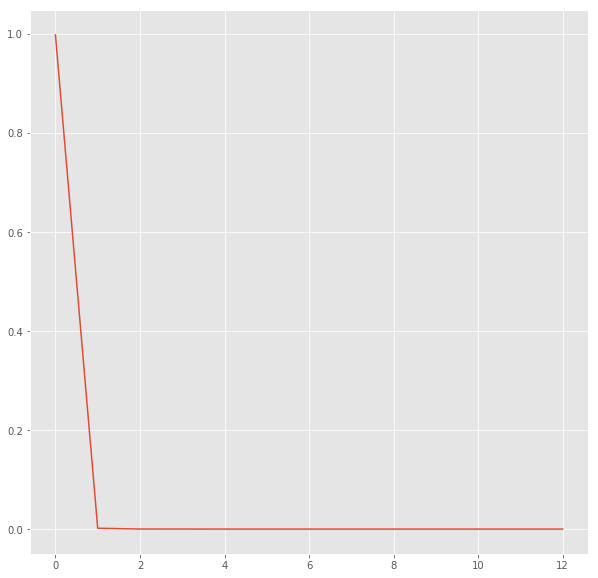

In [4]:
wine_pca, wine_vals, wine_vecs = pca(X_wine)
wine_vals = array([x/sum(wine_vals) for x in wine_vals])
plt.plot(wine_vals)

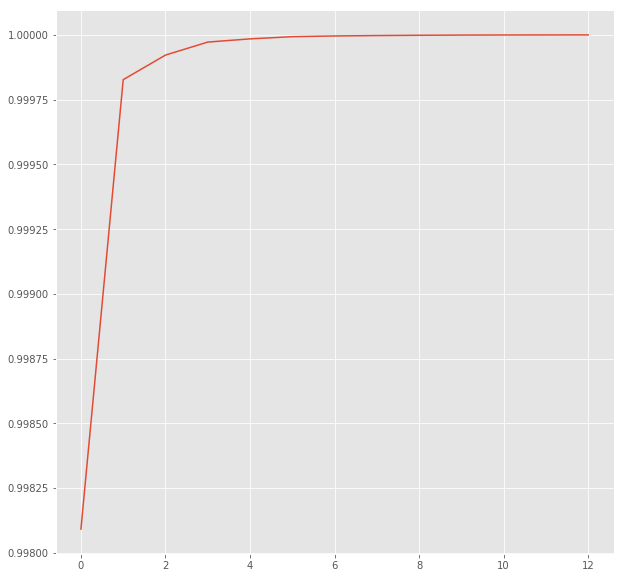

In [5]:
plt.plot(wine_vals.cumsum())

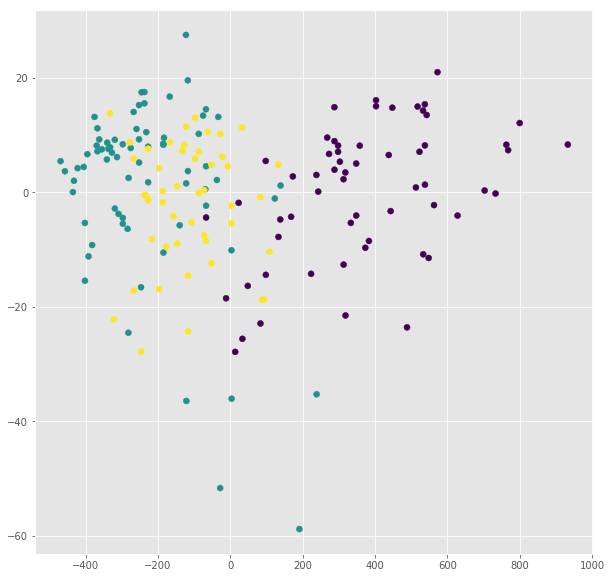

In [6]:
f, ax = plt.subplots(1,1)
plt.scatter(wine_pca[:,0], wine_pca[:,1], c=y_wine)